In [1]:
from ipy import *
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.mplot3d as mplot3d
%matplotlib inline
time_format = '%H:%M:%S'

# Specify file locations

In [2]:
#############################################
##   MEC Files
#############################################
#Oct 26
#MEC_file = 'Z:/mms1/mec/srvy/l2/epht89d/2015/10/mms1_mec_srvy_l2_epht89d_20151026_v2.0.0.cdf'
#Aug 04
MEC_file = 'Z:/mms1/mec/srvy/l2/epht89d/2015/08/mms1_mec_srvy_l2_epht89d_20150804_v2.1.0.cdf'
#Aug 01
#MEC_file = 'Z:/mms1/mec/srvy/l2/epht89d/2015/08/mms1_mec_srvy_l2_epht89d_20150801_v2.1.0.cdf'

In [3]:
#############################################
##   SC Potential Files
#############################################
#Oct 26
#SC_Pot_file = 'Z:/mms1/edp/fast/l2/scpot/2015/10/mms1_edp_fast_l2_scpot_20151026000000_v2.0.0.cdf'
#Aug 04
SC_Pot_file = 'Z:/mms1/edp/fast/l2/scpot/2015/08/mms1_edp_fast_l2_scpot_20150804000000_v1.0.0.cdf'
#Aug 01
#SC_Pot_file = 'Z:/mms1/edp/fast/l2/scpot/2015/08/mms1_edp_fast_l2_scpot_20150801000000_v1.0.0.cdf'

In [4]:
#############################################
##   OMNI IMF Data Files
#############################################
#Oct 26
#Omni_file = 
#Aug 04
Omni_context_file = 'Y:/Conrad/Ionospheric Outflow/Aug 04 - pictures/Aug 04 - omni2_v1.lst'
#Aug 01
#Omni_file = 

# Open Files

In [5]:
CDFs           = {}
CDFs['MEC']    = pycdf.CDF(MEC_file)
CDFs['SC_Pot'] = pycdf.CDF(SC_Pot_file)

In [6]:
Data               = {}
Data['IMF']        = open(Omni_context_file,'r')

# IMF Context

## read omni context data

In [7]:
omni_blob = Data['IMF'].readlines()
Data['IMF'].close()
num_rows = len(omni_blob)
num_cols = len(omni_blob[0].strip('\n').split())-3
data     = np.zeros((num_rows,num_cols))
dates    = []

counter  = 0
for omni in omni_blob:
    #first get the data as an array
    o                = omni.strip('\n').split()
    current_datetime = dt.datetime(int(o[0]),1,1,int(o[2])) + dt.timedelta(int(o[1])-1)
    dates.append(current_datetime)
    data[counter,:]  = map(float,o[3:])
    counter          = counter + 1    

## plot IMF

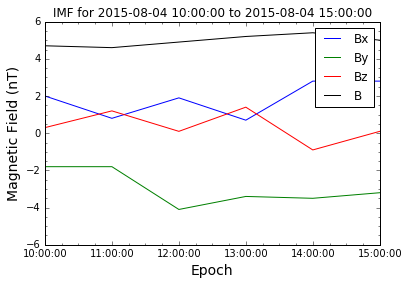

In [8]:
time_slice_IMF = slice(10,16)
plt.plot(dates[time_slice_IMF],data[time_slice_IMF,1],label = 'Bx')
plt.plot(dates[time_slice_IMF],data[time_slice_IMF,2],label = 'By')
plt.plot(dates[time_slice_IMF],data[time_slice_IMF,3],label = 'Bz')
plt.plot(dates[time_slice_IMF],data[time_slice_IMF,0],label='B',color='k')
plt.legend(loc='upper right')
plt.title('IMF for %s to %s' % (dates[time_slice_IMF.start], dates[time_slice_IMF.stop-1]))
plt.minorticks_on()
plt.xlabel('Epoch',fontsize=14)
plt.ylabel('Magnetic Field (nT)',fontsize=14)
plt.show()

## plot solar wind data

[ 487.45833343  496.80343305  486.03722507  492.00109511  471.23941454
  478.97373389]
[ 437.  451.  442.  446.  427.  426.]


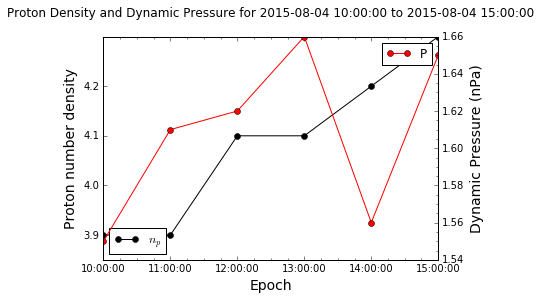

In [9]:
fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(dates[time_slice_IMF],data[time_slice_IMF,5],'ko-',label = r'$n_p$')
ax2.plot(dates[time_slice_IMF],data[time_slice_IMF,7],'ro-',label = 'P')
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
plt.title('Proton Density and Dynamic Pressure for %s to %s\n' % (dates[time_slice_IMF.start], dates[time_slice_IMF.stop-1]))
plt.minorticks_on()
ax1.set_xlabel('Epoch',fontsize=14)
ax1.set_ylabel('Proton number density',fontsize=14)
ax2.set_ylabel('Dynamic Pressure (nPa)',fontsize = 14)

v = np.sqrt(data[time_slice_IMF,7]/data[time_slice_IMF,5]/1.6726e-6)
print(v)
print(data[time_slice_IMF,6])

## plot geomagnetic indices

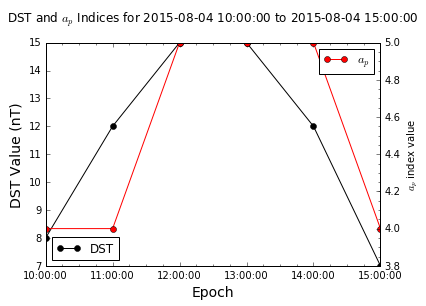

In [10]:
fig21, ax21 = plt.subplots()
ax22 = ax21.twinx()
ax21.plot(dates[time_slice_IMF],data[time_slice_IMF,8],'ko-',label = 'DST')
ax22.plot(dates[time_slice_IMF],data[time_slice_IMF,9],'ro-',label = r'$a_p$')
ax21.legend(loc='lower left')
ax22.legend(loc='upper right')

plt.title(r'DST and $a_p$ Indices for %s to %s' % (dates[time_slice_IMF.start], dates[time_slice_IMF.stop-1])+'\n')
plt.minorticks_on()
ax21.set_xlabel('Epoch',fontsize=14)
ax21.set_ylabel('DST Value (nT)',fontsize=14)
ax22.set_ylabel(r'$a_p$ index value')

plt.show()

# Footprints & Field Type

In [11]:
North_latlon = np.asarray(CDFs['MEC']['mms1_mec_pfn_geod_latlon'])
South_latlon = np.asarray(CDFs['MEC']['mms1_mec_pfs_geod_latlon'])

In [12]:
time_index_MEC_min   = 1600
time_index_MEC_max   = 1900
time_slice_MEC       = slice(time_index_MEC_min,time_index_MEC_max)
terminator_index_MEC = 1650
delta_time_MEC       = time_index_MEC_max - time_index_MEC_min
time_step_MEC        = 40

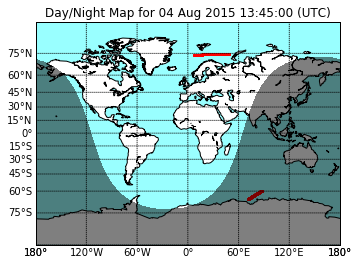

Start date of scan:  2015-08-04 13:20:00
Stop date of scan:   2015-08-04 15:50:00
(300L,)


In [22]:
terminator_date = CDFs['MEC']['Epoch'][terminator_index_MEC]
# draw map with markers for float locations
m = Basemap(projection='mill',lon_0=0)
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,15),labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax+30,60),labels=[0,0,0,1])
nlons = North_latlon[time_slice_MEC,1]
nlats = North_latlon[time_slice_MEC,0]
slons = South_latlon[time_slice_MEC,1]
slats = South_latlon[time_slice_MEC,0]
Nx, Ny = m(nlons,nlats)
Sx, Sy = m(slons,slats)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#ffffff',lake_color='#99ffff')
m.scatter(Nx,Ny,3,marker='o',color='r')
m.scatter(Sx,Sy,3,marker='o',color='r')
CS=m.nightshade(terminator_date)
plt.title('Day/Night Map for %s (UTC)' % terminator_date.strftime("%d %b %Y %H:%M:%S"))
plt.show()
print('Start date of scan: ',CDFs['MEC']['Epoch'][time_slice_MEC.start])
print('Stop date of scan:  ',CDFs['MEC']['Epoch'][time_slice_MEC.stop])
print(Nx.shape)

In [18]:
print(nlons[0], nlats[0])
print(slons[0], slats[0])

48.6642464894 74.45021068
87.5695947575 -59.5803704462


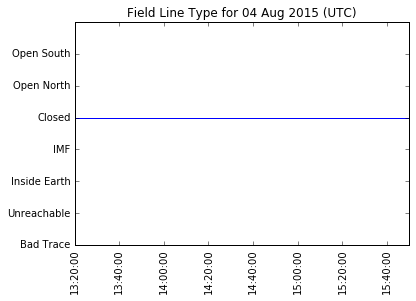

In [15]:
plt.plot(CDFs['MEC']['mms1_mec_fieldline_type'][time_slice_MEC])
x        = np.arange(0,delta_time_MEC,time_step_MEC)
x_labels = []
for px in x:
    x_labels.append(dt.datetime.strftime(CDFs['MEC']['Epoch'][px+time_index_MEC_min],time_format))
plt.xticks(x,x_labels,rotation='vertical')    
y        = np.arange(-3,5,1)
y_labels = ['Bad Trace','Unreachable','Inside Earth','IMF','Closed','Open North','Open South','']
plt.yticks(y,y_labels)
plt.title('Field Line Type for %s (UTC)' % terminator_date.strftime("%d %b %Y"))
plt.show()

# Spacecraft Potential

In [16]:
CDFs['SC_Pot'].keys()

['mms1_edp_scpot_epoch',
 'LABL_1',
 'mms1_edp_scpot',
 'mms1_edp_psp',
 'mms1_edp_dcv',
 'mms1_edp_scpot_bitmask',
 'mms1_edp_scpot_quality']

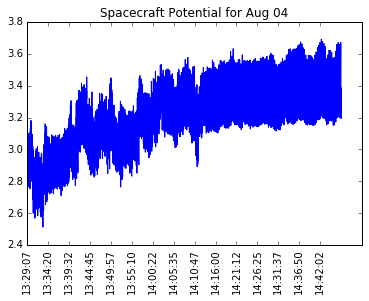

In [17]:
time_index_min = 600000
time_index_max = 750000
delta_time     = time_index_max - time_index_min
time_step      = 10000
time_slice     = slice(time_index_min,time_index_max)
plt.plot(CDFs['SC_Pot']['mms1_edp_scpot'][time_slice])
x        = np.arange(0,delta_time,time_step)
x_labels = []
for px in x:
    x_labels.append(dt.datetime.strftime(CDFs['SC_Pot']['mms1_edp_scpot_epoch'][px+time_index_min],time_format))
plt.xticks(x,x_labels,rotation='vertical')
plt.title('Spacecraft Potential for Aug 04')
plt.show()

# Field Line Tracing - Something of an Art

In [18]:
Fieldline_file = 'Y:/Conrad/Ionospheric Outflow/Aug 04 - pictures/Aug_04_13_30_00_fieldline.txt'
Fieldline      = open(Fieldline_file,'r')
fld_blob       = Fieldline.readlines()
Fieldline.close()
fld            = np.zeros((len(fld_blob),3))

counter  = 0
for f in fld_blob:
    fld[counter,:] = map(float,f.strip('\r\n').split())
    counter        = counter + 1

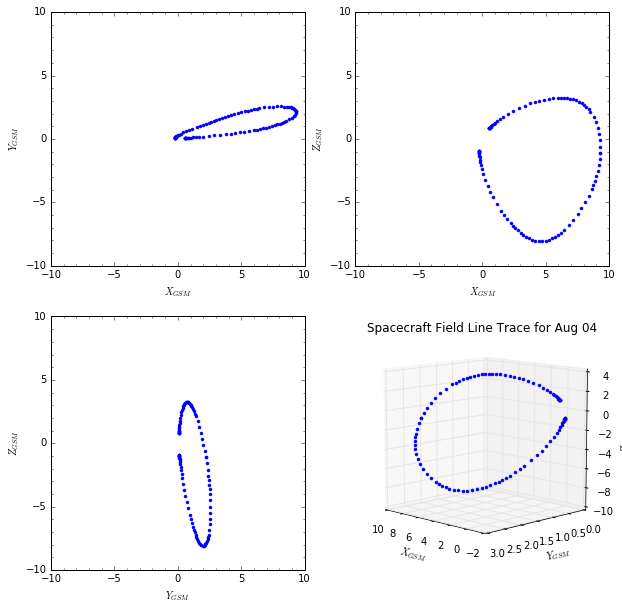

In [21]:
field_line_plot_lim = [-10,10]
fig3 = plt.figure(3,figsize=(10,10))
plt.title('Spacecraft Field Line Trace for Aug 04')
ax1  = plt.subplot(2,2,1)
ax2  = plt.subplot(2,2,2)
ax3  = plt.subplot(2,2,3)
ax4  = plt.subplot(2,2,4,projection='3d')
#x-y projection
ax1.plot(fld[:,0],fld[:,1],'b.')
ax1.set_xlabel(r'$X_{GSM}$')
ax1.set_ylabel(r'$Y_{GSM}$')
ax1.set_xlim(field_line_plot_lim)
ax1.set_ylim(field_line_plot_lim)
ax1.minorticks_on()
#x-z projection
ax2.plot(fld[:,0],fld[:,2],'b.')
ax2.set_xlabel(r'$X_{GSM}$')
ax2.set_ylabel(r'$Z_{GSM}$')
ax2.set_xlim(field_line_plot_lim)
ax2.set_ylim(field_line_plot_lim)
ax2.minorticks_on()
#y-z projection
ax3.plot(fld[:,1],fld[:,2],'b.')
ax3.set_xlabel(r'$Y_{GSM}$')
ax3.set_ylabel(r'$Z_{GSM}$')
ax3.set_xlim(field_line_plot_lim)
ax3.set_ylim(field_line_plot_lim)
ax3.minorticks_on()
#3-d view
ax4.plot(fld[:,0],fld[:,1],fld[:,2],'b.')
ax4.set_xlabel(r'$X_{GSM}$')
ax4.set_ylabel(r'$Y_{GSM}$')
ax4.set_zlabel(r'$Z_{GSM}$')
ax4.view_init(elev=10,azim=135)
plt.show()

In [11]:
start_time_index = 480
stop_time_index  = 635
N_MLT  = np.zeros((635-480))
N_Mlat = np.zeros((635-480))
S_MLT = np.zeros((635-480))
S_Mlat = np.zeros((635-480))
for i in range(0,stop_time_index-start_time_index):
    N_GSM_vec = CDFs['MEC']['mms1_mec_pfn_gsm'][i+start_time_index]
    N_MLT[i] = compute_mag_LT(N_GSM_vec)
    N_Mlat[i] = compute_mag_lat(N_GSM_vec)
    S_GSM_vec = CDFs['MEC']['mms1_mec_pfs_gsm'][i+start_time_index]
    S_MLT[i] = compute_mag_LT(S_GSM_vec)
    S_Mlat[i] = compute_mag_lat(S_GSM_vec)    

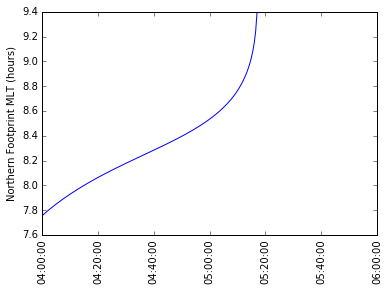

In [12]:
plt.plot(N_MLT)
x        = np.arange(0,740-480,40)
x_labels = []
for px in x:
    x_labels.append(dt.datetime.strftime(CDFs['MEC']['Epoch'][px+480],time_format))
plt.xticks(x,x_labels,rotation='vertical') 
plt.ylabel('Northern Footprint MLT (hours)')
plt.show()

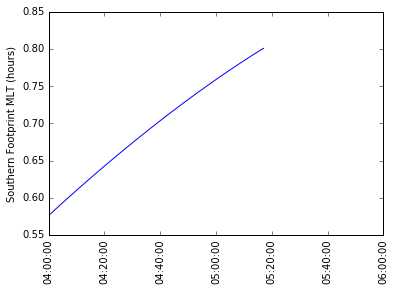

In [13]:
plt.plot(S_MLT)
x        = np.arange(0,740-480,40)
x_labels = []
for px in x:
    x_labels.append(dt.datetime.strftime(CDFs['MEC']['Epoch'][px+480],time_format))
plt.xticks(x,x_labels,rotation='vertical') 
plt.ylabel('Southern Footprint MLT (hours)')
plt.show()

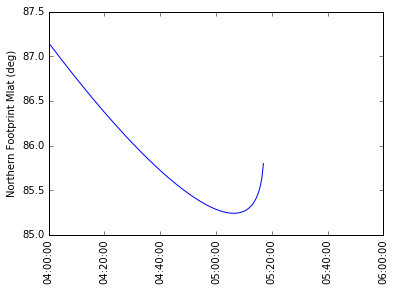

In [14]:
plt.plot(N_Mlat)
x        = np.arange(0,740-480,40)
x_labels = []
for px in x:
    x_labels.append(dt.datetime.strftime(CDFs['MEC']['Epoch'][px+480],time_format))
plt.xticks(x,x_labels,rotation='vertical') 
plt.ylabel('Northern Footprint Mlat (deg)')
plt.show()

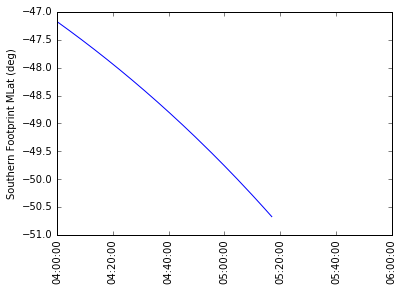

In [15]:
plt.plot(S_Mlat)
x        = np.arange(0,740-480,40)
x_labels = []
for px in x:
    x_labels.append(dt.datetime.strftime(CDFs['MEC']['Epoch'][px+480],time_format))
plt.xticks(x,x_labels,rotation='vertical') 
plt.ylabel('Southern Footprint MLat (deg)')
plt.show()

In [53]:
def compute_mag_LT(GSM_vec):
    x_GSM, y_GSM, z_GSM = GSM_vec[0:3]
    
    long_GSM = np.arctan2(y_GSM,x_GSM)*180/np.pi
    
    LT_GSM   = long_GSM*24.0/360.0 - 12
    
    LT_GSM   = LT_GSM % 24
    
    return LT_GSM

In [54]:
def compute_mag_lat(GSM_vec):
    x_GSM, y_GSM, z_GSM = GSM_vec[0:3]
    r_GSM = np.sqrt(GSM_vec.dot(GSM_vec))

    lat_GSM = np.arcsin(z_GSM/r_GSM)
   
    return lat_GSM*180/np.pi

In [89]:
N = 15*60*2+45*2
#N = 14*60*2
print(CDFs['MEC']['Epoch'][N])
print(CDFs['MEC']['mms1_mec_r_gsm'][N]/6378.14)
r_GSM = CDFs['MEC']['mms1_mec_r_gsm'][N]

2015-08-04 15:45:00
[ -1.11815129  10.32444624  -3.27421466]


In [87]:
print(compute_mag_LT(r_GSM))
print(compute_mag_lat(r_GSM))

18.4120745283
-17.499468062


In [88]:
np.arctan2(r_GSM[1],r_GSM[0])*180/np.pi

96.181117925210685

In [85]:
6.97*60/15

27.88